# ___Imports___

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from geopy.geocoders import Nominatim
import geopy as gp
from datetime import datetime
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

# ___Load Data___

In [80]:
# load data for nasa
data = pd.read_csv('../data/ALL_DATA.csv')
print(data.columns)


data.head()
np.shape(data)
  

Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')


(88705, 8)

# ___Scaling (10%)___

In [14]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
# all_data['year'].fillna(0).astype(int)
# all_data['mass'].fillna(0).astype(int)


data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())


Original Data Stats: 

                 id          mass          year           lat          long  \
count  88705.000000  4.558500e+04  88417.000000  81378.000000  81378.000000   
mean   37088.348053  1.327808e+04   1999.326928      2.815932     38.871848   
std    23580.335315  5.749889e+05     21.475473     52.727649     73.400616   
min        1.000000  0.000000e+00    301.000000    -87.366670   -174.833333   
25%    16281.000000  7.200000e+00   1998.000000    -71.500000      5.553056   
50%    34337.000000  3.260000e+01   2002.000000     29.217500     21.500000   
75%    56576.000000  2.026000e+02   2008.000000     47.381944     75.271389   
max    80694.000000  6.000000e+07   2501.000000     82.569167    354.473330   

          Elevation  
count  42977.000000  
mean     333.548386  
std      539.306798  
min      -11.000000  
25%        0.000000  
50%      100.000000  
75%      445.000000  
max     9999.000000  

--------

New Sample Data Stats: 

                 id          ma

In [15]:
all_data = pd.DataFrame(data=data)
print(all_data)
# all_data.columns = data.feature_names
# data['year'] = data.target

# print(data.head())
all_data.columns

            id       class      mass   fall    year        lat        long  \
8346   32572.0          H6     45.10  Found  2002.0        NaN         NaN   
37613  23590.0  Iron, IIAB  26000.00  Found  1898.0 -22.900000  -69.350000   
2159     974.0          H6     14.60  Found  1985.0 -76.850200  156.310700   
13696  47773.0          L4      1.86  Found  2003.0 -72.983889   75.246389   
64836   6811.0         NaN       NaN    NaN  2000.0  43.880000   10.260000   
...        ...         ...       ...    ...     ...        ...         ...   
54263  11328.0         NaN       NaN    NaN  1999.0  34.250000  135.750000   
78334  60992.0         NaN       NaN    NaN  2007.0  40.201111  115.934167   
32423  19268.0          L5      5.90  Found  1993.0 -84.575870  162.568500   
23165  15706.0          L5    367.10  Found  2000.0 -79.683330  155.750000   
60762  46286.0         NaN       NaN    NaN  2001.0  54.200000   26.100000   

       Elevation  
8346         NaN  
37613        NaN  
2159  

Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')

# ___One Hot Encoding___

In [111]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# ### Categorical data to be converted to numeric data
class_data = list(all_data['class'])
fall_data = list(all_data['fall'])

### integer mapping using LabelEncoder
le = LabelEncoder()
class_encoded = le.fit_transform(class_data)
fall_encoded = le.fit_transform(fall_data)
class_encoded = class_encoded.reshape(len(class_encoded), 1)
fall_encoded = fall_encoded.reshape(len(fall_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_class = onehot_encoder.fit_transform(class_encoded)
onehot_encoded_fall = onehot_encoder.fit_transform(fall_encoded)

print(onehot_encoded_class)
all_data['class'] = onehot_encoded_class
print(all_data['class'])

print('\n\n\n')
print(onehot_encoded_fall)
all_data['fall'] = onehot_encoded_fall
print(all_data['fall'])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
8346     1.0
37613    1.0
2159     1.0
13696    1.0
64836    1.0
        ... 
54263    1.0
78334    1.0
32423    1.0
23165    1.0
60762    1.0
Name: class, Length: 8870, dtype: float64




[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
8346     1.0
37613    1.0
2159     1.0
13696    1.0
64836    1.0
        ... 
54263    1.0
78334    1.0
32423    1.0
23165    1.0
60762    1.0
Name: fall, Length: 8870, dtype: float64


In [109]:
print(all_data.head)

<bound method NDFrame.head of             id  class      mass  fall    year        lat        long  \
8346   32572.0    1.0     45.10   0.0  2002.0        NaN         NaN   
37613  23590.0    1.0  26000.00   0.0  1898.0 -22.900000  -69.350000   
2159     974.0    1.0     14.60   0.0  1985.0 -76.850200  156.310700   
13696  47773.0    1.0      1.86   0.0  2003.0 -72.983889   75.246389   
64836   6811.0    1.0       NaN   0.0  2000.0  43.880000   10.260000   
...        ...    ...       ...   ...     ...        ...         ...   
54263  11328.0    1.0       NaN   0.0  1999.0  34.250000  135.750000   
78334  60992.0    1.0       NaN   0.0  2007.0  40.201111  115.934167   
32423  19268.0    1.0      5.90   0.0  1993.0 -84.575870  162.568500   
23165  15706.0    1.0    367.10   0.0  2000.0 -79.683330  155.750000   
60762  46286.0    1.0       NaN   0.0  2001.0  54.200000   26.100000   

       Elevation  
8346         NaN  
37613        NaN  
2159         NaN  
13696        NaN  
64836     

# ___Bar Plot of year counts___

<BarContainer object of 167 artists>

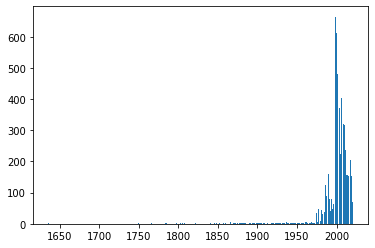

In [52]:
count = all_data.year.value_counts()
plt.bar(count.keys(), count.values)

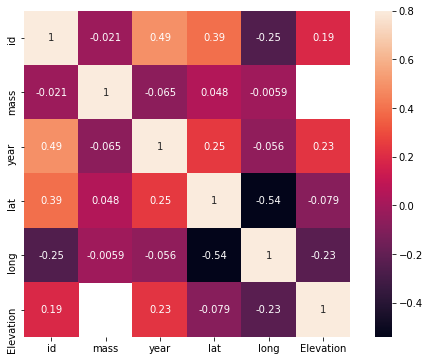

In [71]:
# heat map of correlation of features
correlation_matrix = all_data.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True, annot=True)
plt.show()

In [75]:
#Correlation with output variable
cor_target = abs(correlation_matrix['year'])
print(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

id           0.491391
mass         0.064883
year         1.000000
lat          0.248318
long         0.056223
Elevation    0.234242
Name: year, dtype: float64


id           0.491391
year         1.000000
lat          0.248318
Elevation    0.234242
Name: year, dtype: float64

# ___Build Model___

In [51]:
def data_model(data, target):  #x,y
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
    pipeline = make_pipeline(LinearRegression())
    model = pipeline.fit(X_train, y_train)
    
    return (X_test, y_test, model)

# ___Test Model___

In [81]:

        #Target Variable
x = all_data[all_data.columns[0]]
y = all_data[all_data.columns[1]]

In [87]:
print("Value distribution of features: ")
print(list(all_data.iloc[0]))

min_max = MinMaxScaler()
data_min_max = min_max.fit_transform(all_data)
print('\n')
print("Value distribution after min max: ")
print(list(boston_min_max[0]))

# std = StandardScaler()
# boston_std = std.fit_transform(boston['data'])
# print('\n')
# print("Value distribution after std: ")
# print(list(boston_std[0]))

Value distribution of features: 
[32572.0, 'H6', 45.1, 'Found', 2002.0, nan, nan, nan]


ValueError: could not convert string to float: 'H6'